In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


customer = pd.read_csv('/content/drive/MyDrive/RFM_DA/Customer_info.csv')
discount = pd.read_csv('/content/drive/MyDrive/RFM_DA/Discount_info.csv')
marketing = pd.read_csv('/content/drive/MyDrive/RFM_DA/Marketing_info.csv')
onlinesales = pd.read_csv('/content/drive/MyDrive/RFM_DA/Onlinesales_info.csv')

In [4]:
#dataset 병합 전체금액 = 수량*평균금액 + 배송료
onlinesales['전체금액'] = onlinesales['수량'] * onlinesales['평균금액'] + onlinesales['배송료']
onlinesales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,전체금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,160.21
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,160.21
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,8.55
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,94.15
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,23.00
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,127.80
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,55.42
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,158.38
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,409.10


In [5]:
#고객 성별정보 추가
final = pd.merge(customer,onlinesales, on='고객ID',how='outer')
final

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,전체금액
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,160.21
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,160.21
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,8.55
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,94.15
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,여,New York,45,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,127.80
52920,USER_0504,여,New York,45,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,55.42
52921,USER_0504,여,New York,45,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,158.38
52922,USER_0562,여,California,7,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,409.10


In [6]:
#결측값 처리
discount.isnull().sum()

월         0
제품카테고리    0
쿠폰코드      0
할인율       0
dtype: int64

In [8]:
#쿠폰코드 카테고리화 (숫자제거)
discount['쿠폰코드']=discount['쿠폰코드'].str.replace('\d+', '', regex=True)

#쿠폰코드 결측지를 'none'으로 대체, '할인율'의 결측치 0으로 대체
discount['쿠폰코드'].fillna('None', inplace=True)
discount['할인율'].fillna(0, inplace=True)
print(discount['쿠폰코드'].unique())
print(discount['할인율'].unique())

['SALE' 'ELEC' 'OFF' 'EXTRA' 'AIO' 'NOTES' 'HGEAR' 'NE' 'WEMP' 'BT' 'NCA'
 'HOU' 'ACC' 'GC' 'NJ' 'AND']
[10 20 30]


In [9]:
#테이블 병합하기
#1. 월변수 생성
import calendar

final['거래날짜'] = pd.to_datetime(final['거래날짜'])
final['월'] = final['거래날짜'].dt.month
reversed_month_mapping = {calendar.month_abbr[i]: str(i) for i in range(1, 13)}

# 2. 월 열의 값을 해당 월 번호로 변경후 타입 int로 변경
discount['월'] = discount['월'].map(reversed_month_mapping)
discount['월'] = discount['월'].astype(int)
final = pd.merge(final, discount, on=['제품카테고리', '월'], how='left')


In [11]:
#각 제품 카테고리 평균 금액
import pandas as pd
average_prices = final.groupby('제품카테고리')['평균금액'].mean()

# 사분위수 계산
quantiles = average_prices.quantile([0.25, 0.5, 0.75])
# low, medium, high, very high 구간 설정
low_threshold = quantiles[0.25]
medium_threshold = quantiles[0.5]
high_threshold = quantiles[0.75]

# 제품가격등급 설정 함수
def categorize_price(price):
    if price <= low_threshold:
        return 'Low'
    elif price <= medium_threshold:
        return 'Medium'
    elif price <= high_threshold:
        return 'High'
    else:
        return 'Very High'

# 각 제품 카테고리에 대한 제품가격등급 설정
average_prices = average_prices.reset_index()
average_prices['제품가격등급'] = average_prices['평균금액'].apply(categorize_price)

# 결과 출력
average_prices

,제품카테고리,평균금액,제품가격등급
0,Accessories,8.211068,Medium
1,Android,15.903488,High
2,Apparel,19.788995,High
3,Backpacks,80.046404,Very High
4,Bags,29.830797,High
5,Bottles,3.437201,Low
6,Drinkware,10.696893,Medium
7,Fun,6.743812,Medium
8,Gift Cards,111.363270,Very High
9,Google,16.446190,High


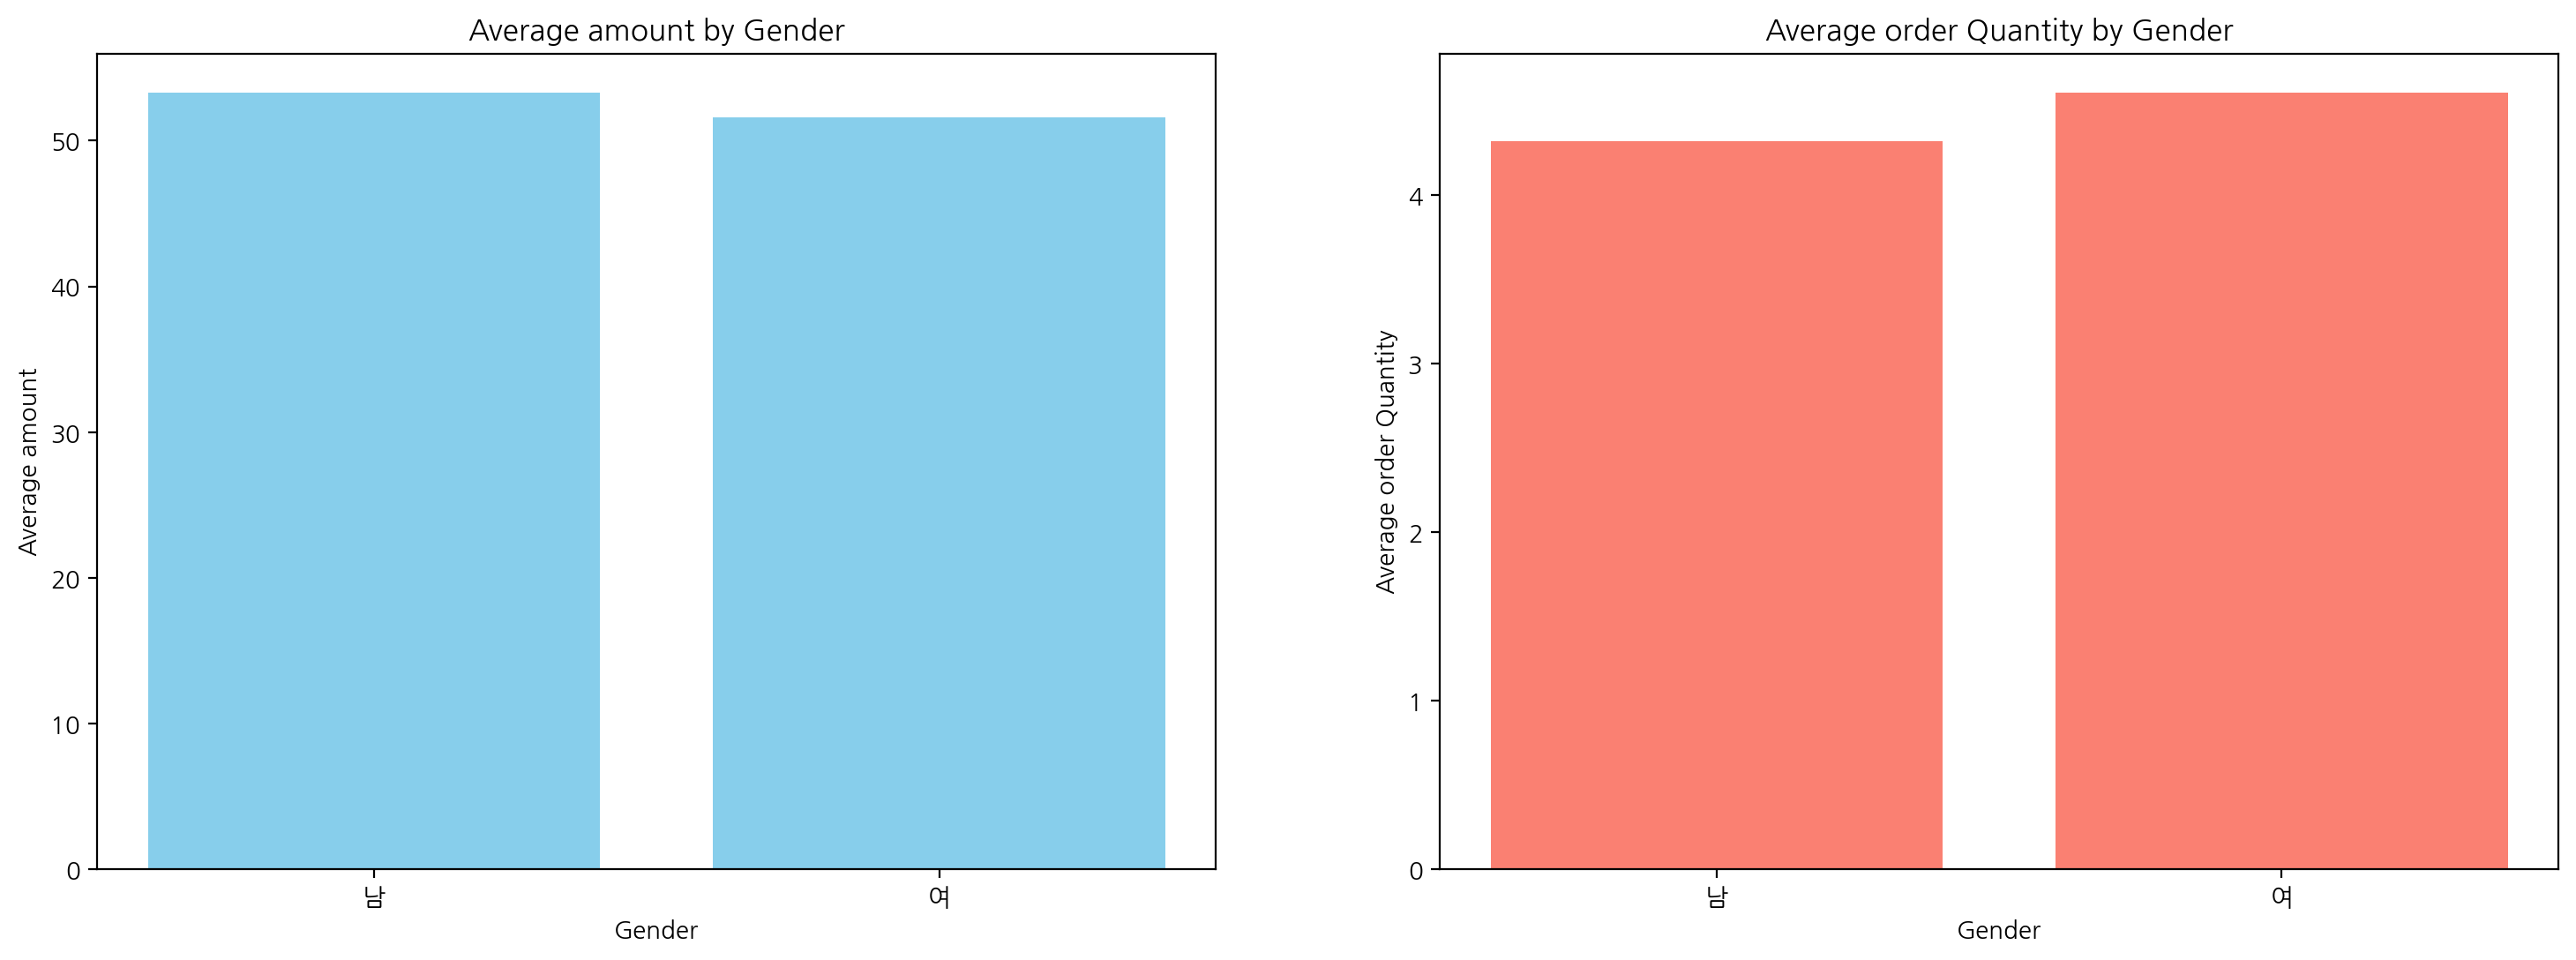

In [13]:
#성별에 따른 구매 분석
# 성별에 따른 평균금액 계산
gender_avg_amount = final.groupby('성별')['평균금액'].mean()
# 성별에 따른 평균주문량 계산
gender_avg_quantity = final.groupby('성별')['수량'].mean()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 성별에 따른 평균금액 그래프
axes[0].bar(gender_avg_amount.index, gender_avg_amount.values, color='skyblue')
axes[0].set_title('Average amount by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average amount')

# 성별에 따른 평균주문량 그래프
axes[1].bar(gender_avg_quantity.index, gender_avg_quantity.values, color='salmon')
axes[1].set_title('Average order Quantity by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average order Quantity')

plt.show()

In [14]:
# 코호트 분석1. 성별과 제품 카테고리별 신규 유입률
import datetime
# Assuming '거래날짜' column is in string format
final['거래날짜'] = pd.to_datetime(final['거래날짜'])
# 일 파생변수
final['일'] = final['거래날짜'].dt.day
# 요일 파생변수
final['요일'] = final['거래날짜'].dt.dayofweek
# 주차 파생변수
final['주차'] = final['거래날짜'].apply(lambda x: x.strftime('%V'))

In [15]:
final['최초구매날짜'] = final.groupby(['고객ID'])['거래날짜'].transform('min')

final['최초구매날짜']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
52919   2019-12-31
52920   2019-12-31
52921   2019-12-31
52922   2019-12-31
52923   2019-12-31
Name: 최초구매날짜, Length: 52924, dtype: datetime64[ns]

In [16]:
final['최초구매날짜_월'] = final['최초구매날짜'].dt.month

final['최초구매날짜_월']

0         1
1         1
2         1
3         1
4         1
         ..
52919    12
52920    12
52921    12
52922    12
52923    12
Name: 최초구매날짜_월, Length: 52924, dtype: int32

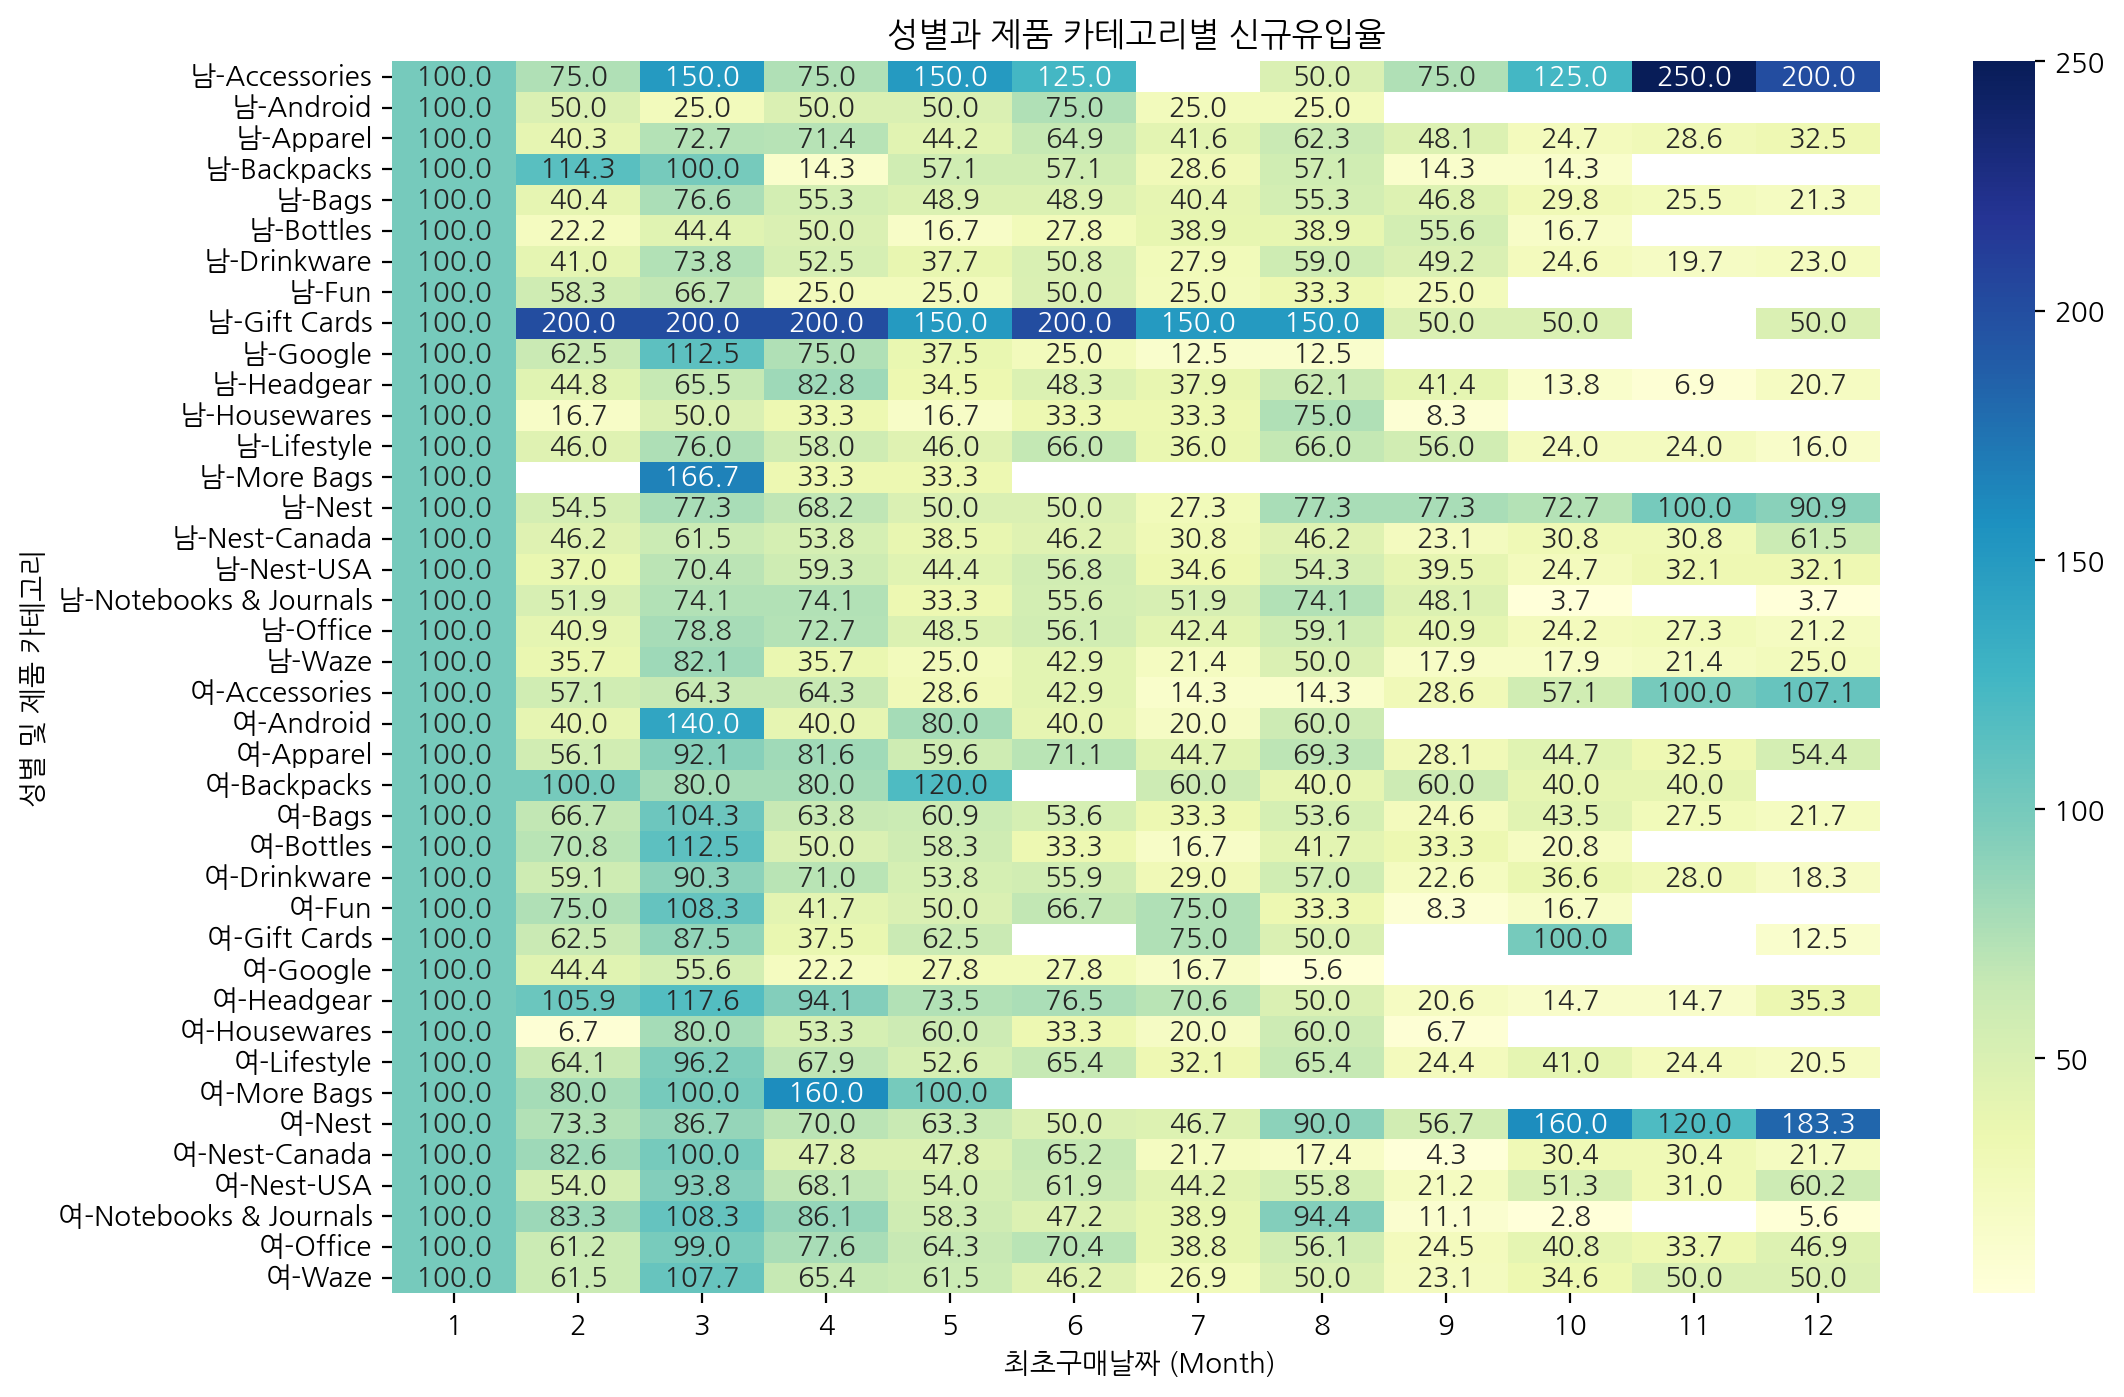

In [17]:
import seaborn as sns

# 성별과 제품 카테고리에 따른 신규유입을 계산하는 함수
def calculate_gender_category_retention_rate(final):
    # 성별과 제품 카테고리에 따른 CohortIndex_M에 따른 고객 수를 계산
    cohort_data = final.groupby(['성별', '제품카테고리', '최초구매날짜_월'])['고객ID'].nunique().reset_index()

    # Pivot 테이블로 변환하여 각 CohortIndex_M에 따른 잔존율을 계산
    pivot_table = cohort_data.pivot_table(index=['성별', '제품카테고리'], columns='최초구매날짜_월', values='고객ID')

    # 잔존율을 계산
    retention_rate = pivot_table.divide(pivot_table.iloc[:, 0], axis=0) * 100

    return retention_rate

# 주어진 데이터셋에 대해서 성별과 제품 카테고리별 잔존율 계산
gender_category_new_rate = calculate_gender_category_retention_rate(final)

# 히트맵으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(gender_category_new_rate, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('성별과 제품 카테고리별 신규유입율')
plt.xlabel(' 최초구매날짜 (Month)')
plt.ylabel('성별 및 제품 카테고리')
plt.show()

In [34]:
gender_category_new_rate

최초구매날짜_월                    1           2           3           4   \
성별 제품카테고리                                                            
남  Accessories           100.0   75.000000  150.000000   75.000000   
   Android               100.0   50.000000   25.000000   50.000000   
   Apparel               100.0   40.259740   72.727273   71.428571   
   Backpacks             100.0  114.285714  100.000000   14.285714   
   Bags                  100.0   40.425532   76.595745   55.319149   
   Bottles               100.0   22.222222   44.444444   50.000000   
   Drinkware             100.0   40.983607   73.770492   52.459016   
   Fun                   100.0   58.333333   66.666667   25.000000   
   Gift Cards            100.0  200.000000  200.000000  200.000000   
   Google                100.0   62.500000  112.500000   75.000000   
   Headgear              100.0   44.827586   65.517241   82.758621   
   Housewares            100.0   16.666667   50.000000   33.333333   
   Lifestyle             100.0   46.000000   76.000000   58.000000   
   More Bags             100.0         NaN  166.666667   33.333333   
   Nest                  100.0   54.545455   77.272727   68.181818   
   Nest-Canada           100.0   46.153846   61.538462   53.846154   
   Nest-USA              100.0   37.037037   70.370370   59.259259   
   Notebooks & Journals  100.0   51.851852   74.074074   74.074074   
   Office                100.0   40.909091   78.787879   72.727273   
   Waze                  100.0   35.714286   82.142857   35.714286   
여  Accessories           100.0   57.142857   64.285714   64.285714   
   Android               100.0   40.000000  140.000000   40.000000   
   Apparel               100.0   56.140351   92.105263   81.578947   
   Backpacks             100.0  100.000000   80.000000   80.000000   
   Bags                  100.0   66.666667  104.347826   63.768116   
   Bottles               100.0   70.833333  112.500000   50.000000   
   Drinkware             100.0   59.139785   90.322581   70.967742   
   Fun                   100.0   75.000000  108.333333   41.666667   
   Gift Cards            100.0   62.500000   87.500000   37.500000   
   Google                100.0   44.444444   55.555556   22.222222   
   Headgear              100.0  105.882353  117.647059   94.117647   
   Housewares            100.0    6.666667   80.000000   53.333333   
   Lifestyle             100.0   64.102564   96.153846   67.948718   
   More Bags             100.0   80.000000  100.000000  160.000000   
   Nest                  100.0   73.333333   86.666667   70.000000   
   Nest-Canada           100.0   82.608696  100.000000   47.826087   
   Nest-USA              100.0   53.982301   93.805310   68.141593   
   Notebooks & Journals  100.0   83.333333  108.333333   86.111111   
   Office                100.0   61.224490   98.979592   77.551020   
   Waze                  100.0   61.538462  107.692308   65.384615   

최초구매날짜_월                         5           6           7           8   \
성별 제품카테고리                                                                 
남  Accessories           150.000000  125.000000         NaN   50.000000   
   Android                50.000000   75.000000   25.000000   25.000000   
   Apparel                44.155844   64.935065   41.558442   62.337662   
   Backpacks              57.142857   57.142857   28.571429   57.142857   
   Bags                   48.936170   48.936170   40.425532   55.319149   
   Bottles                16.666667   27.777778   38.888889   38.888889   
   Drinkware              37.704918   50.819672   27.868852   59.016393   
   Fun                    25.000000   50.000000   25.000000   33.333333   
   Gift Cards            150.000000  200.000000  150.000000  150.000000   
   Google                 37.500000   25.000000   12.500000   12.500000   
   Headgear               34.482759   48.275862   37.931034   62.068966   
   Housewares             16.666667   33.333333   33.333333   75.000000   
   Lifest

제품카테고리
Accessories             30.113095
Android                 20.000000
Apparel                 12.027522
Backpacks                0.500000
Bags                    31.905496
Bottles                 43.226190
Drinkware               31.329656
Fun                     45.312500
Google                  39.500000
Headgear                35.700275
Housewares              99.500000
Lifestyle               24.268374
Nest                     6.492151
Nest-Canada             25.633333
Nest-USA                12.386999
Notebooks & Journals    25.073770
Office                  19.674590
Waze                    32.740028
dtype: float64


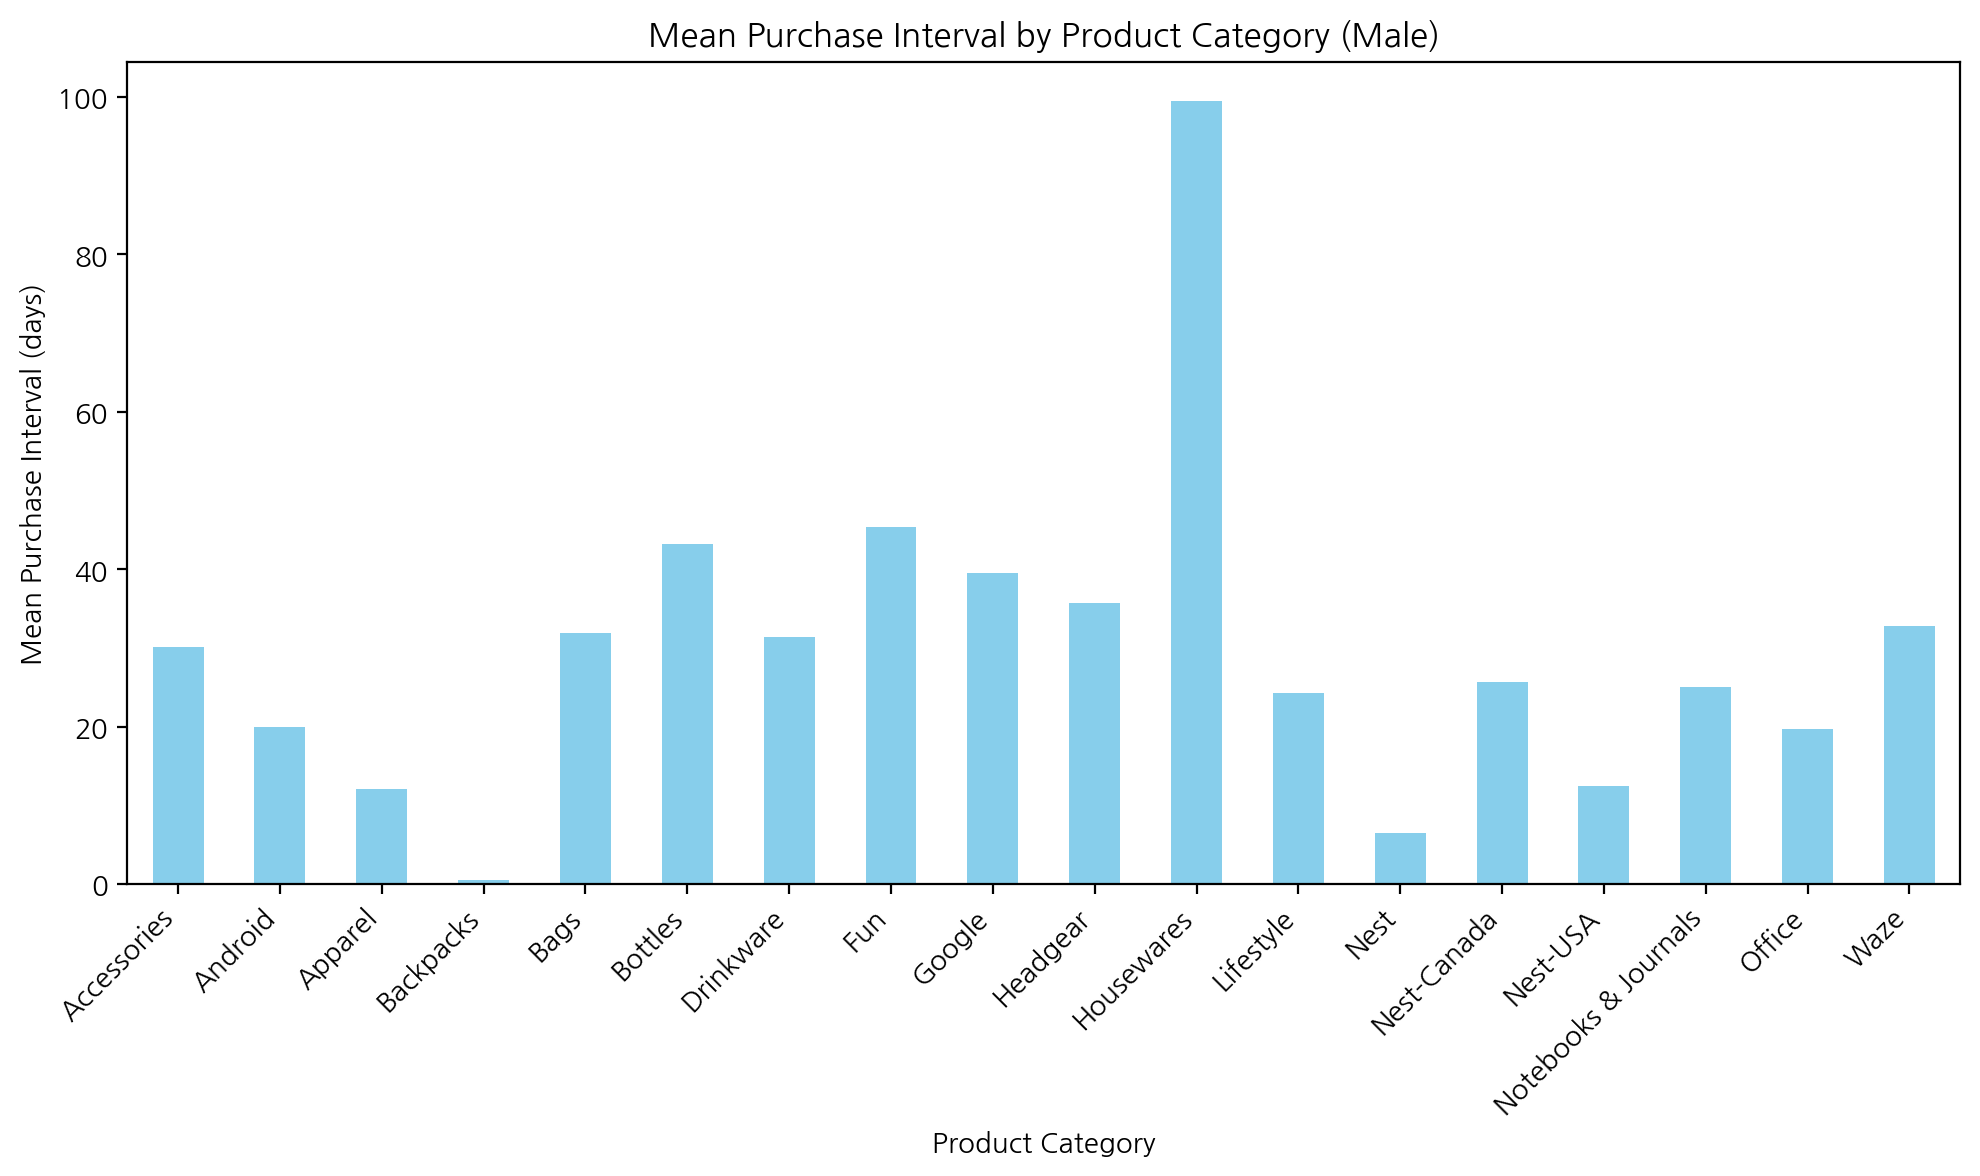

In [18]:
# 코호트 분석2. 성별에 따른 카테고리별 평균 구매주기
final_male = final[final['성별'] == '남']
final_female = final[final['성별'] == '여']
# 고객별로 첫 번째 및 마지막 구매일 계산
customer_first_last_purchase = final_male.groupby(['고객ID', '제품카테고리']).agg(
    첫구매일=('거래날짜', 'min'),
    마지막구매일=('거래날짜', 'max')
)

# 고객별로 총 구매량 계산
customer_total_transactions = final_male.groupby(['고객ID', '제품카테고리']).size()


# 첫 번째 및 마지막 구매일을 기반으로 평균 구매 주기 계산 (일(day) 단위)
customer_purchase_interval = (customer_first_last_purchase['마지막구매일'] - customer_first_last_purchase['첫구매일']).dt.days / customer_total_transactions

# 구매 간격이 0보다 큰 값을 가진 데이터만 필터링
valid_purchase_interval = customer_purchase_interval[customer_purchase_interval > 0]

# 0이 아닌 값으로 평균 구매 주기 계산
mean_purchase_interval_by_category = valid_purchase_interval.groupby('제품카테고리').mean()

# 제품 카테고리별 평균 구매 주기 출력
print(mean_purchase_interval_by_category)

# 시각화
plt.figure(figsize=(10, 6))
mean_purchase_interval_by_category.plot(kind='bar', color='skyblue')
plt.title('Mean Purchase Interval by Product Category (Male)')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase Interval (days)')
plt.xticks(rotation=45, ha='right')  # x 축 레이블 회전
plt.tight_layout()
plt.show()

In [35]:
mean_purchase_interval_by_category

제품카테고리
Accessories             13.077083
Apparel                  9.816672
Backpacks               21.611111
Bags                    32.313778
Bottles                 37.541176
Drinkware               24.098710
Fun                     35.338889
Gift Cards              22.333333
Google                  28.687500
Headgear                35.841752
Housewares              46.916667
Lifestyle               27.367682
Nest                     7.521985
Nest-Canada             41.752381
Nest-USA                11.098444
Notebooks & Journals    28.447107
Office                  19.529555
Waze                    35.026444
dtype: float64

제품카테고리
Accessories             13.077083
Apparel                  9.816672
Backpacks               21.611111
Bags                    32.313778
Bottles                 37.541176
Drinkware               24.098710
Fun                     35.338889
Gift Cards              22.333333
Google                  28.687500
Headgear                35.841752
Housewares              46.916667
Lifestyle               27.367682
Nest                     7.521985
Nest-Canada             41.752381
Nest-USA                11.098444
Notebooks & Journals    28.447107
Office                  19.529555
Waze                    35.026444
dtype: float64


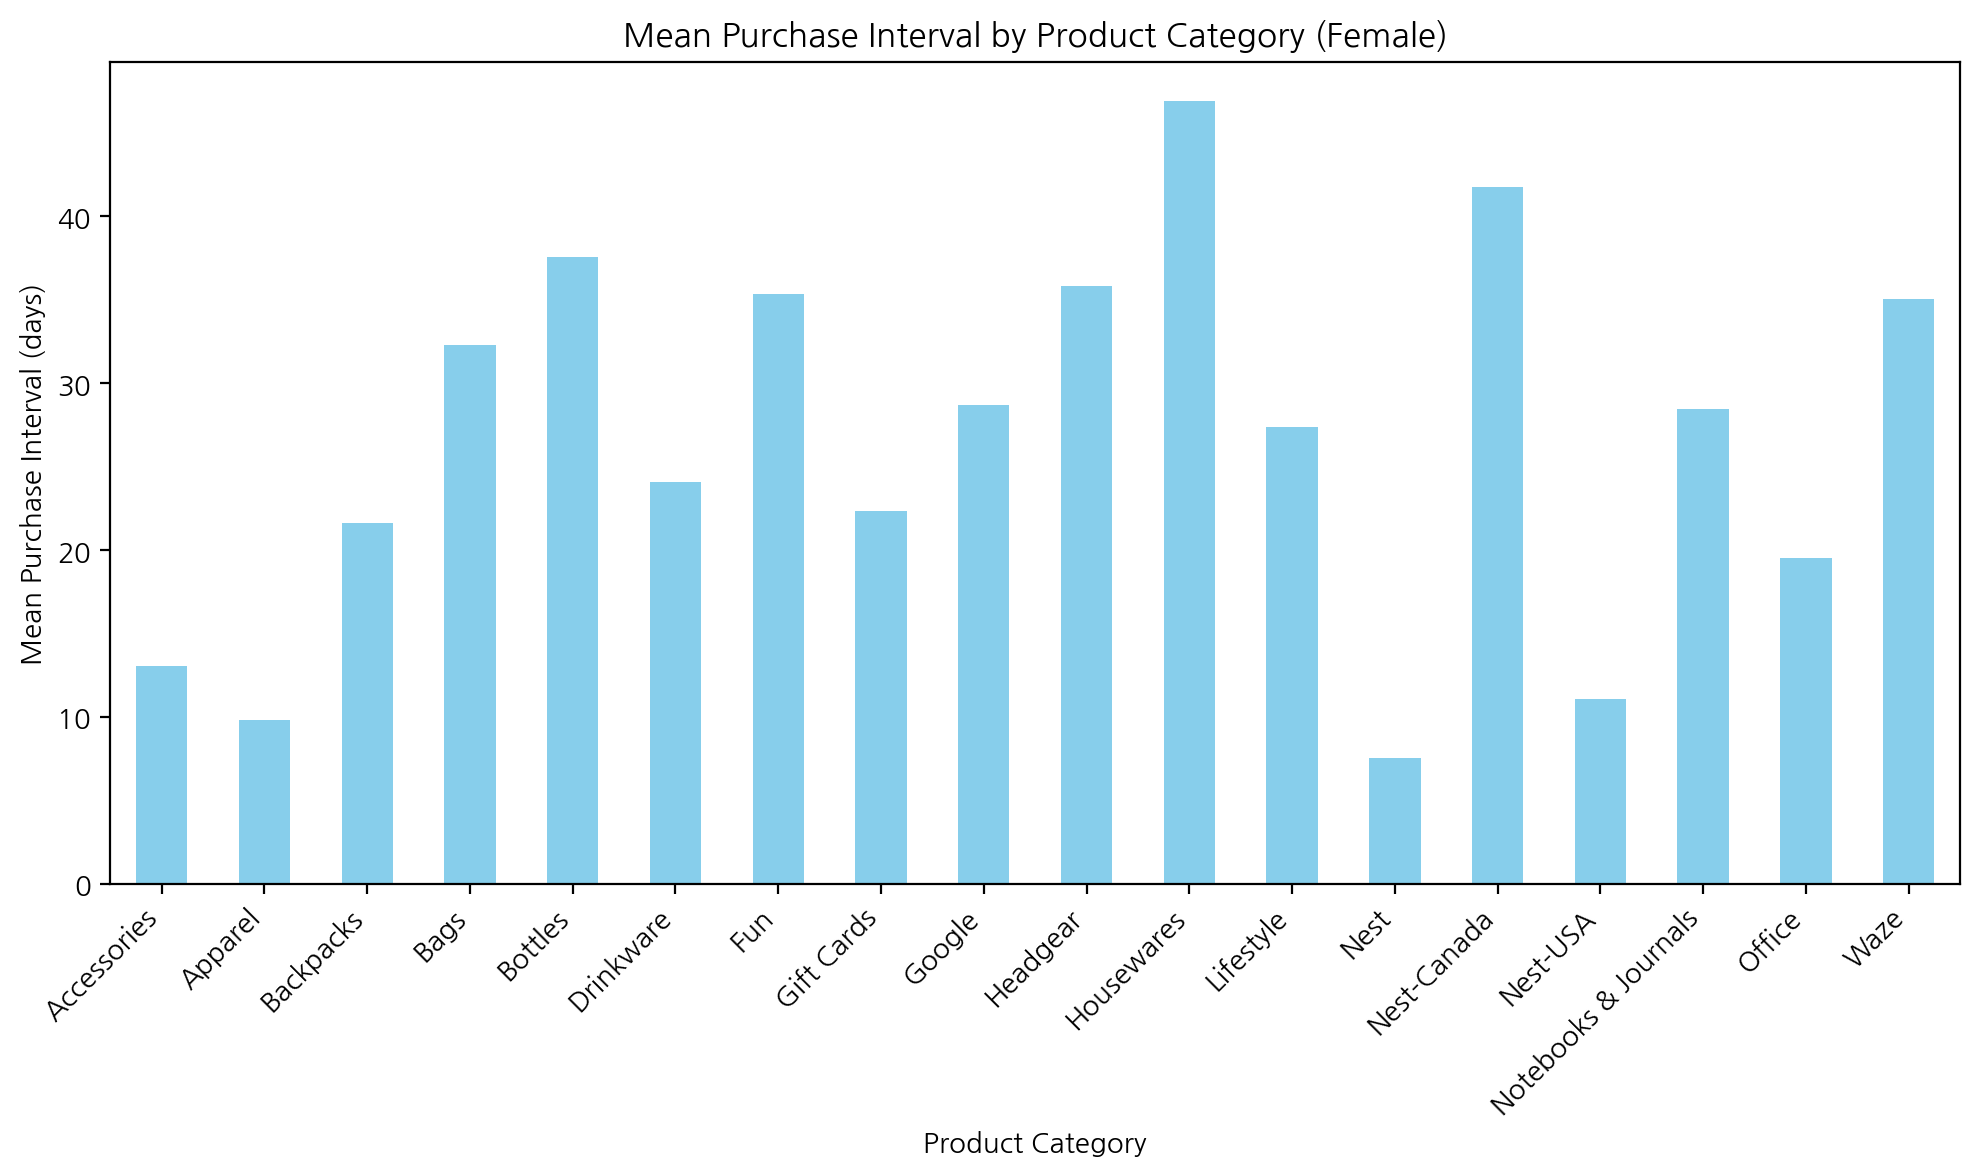

In [19]:
# 고객별로 첫 번째 및 마지막 구매일 계산
customer_first_last_purchase = final_female.groupby(['고객ID', '제품카테고리']).agg(
    첫구매일=('거래날짜', 'min'),
    마지막구매일=('거래날짜', 'max')
)

# 고객별로 총 구매량 계산
customer_total_transactions = final_female.groupby(['고객ID', '제품카테고리']).size()


# 첫 번째 및 마지막 구매일을 기반으로 평균 구매 주기 계산 (일(day) 단위)
customer_purchase_interval = (customer_first_last_purchase['마지막구매일'] - customer_first_last_purchase['첫구매일']).dt.days / customer_total_transactions

# 구매 간격이 0보다 큰 값을 가진 데이터만 필터링
valid_purchase_interval = customer_purchase_interval[customer_purchase_interval > 0]

# 0이 아닌 값으로 평균 구매 주기 계산
mean_purchase_interval_by_category = valid_purchase_interval.groupby('제품카테고리').mean()

# 제품 카테고리별 평균 구매 주기 출력
print(mean_purchase_interval_by_category)

# 시각화
plt.figure(figsize=(10, 6))
mean_purchase_interval_by_category.plot(kind='bar', color='skyblue')
plt.title('Mean Purchase Interval by Product Category (Female)')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase Interval (days)')
plt.xticks(rotation=45, ha='right')  # x 축 레이블 회전
plt.tight_layout()
plt.show()

In [20]:
#코호트 분석3. 성별 잔존율
month_diff = final['거래날짜'].dt.month - final['최초구매날짜'].dt.month
final['CohortIndex_M'] = month_diff +1
final['최초구매날짜_월'] = final['최초구매날짜'].dt.month

final['최초구매날짜_월']
final_male.head()


,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,쿠폰상태,전체금액,월,쿠폰코드,할인율,일,요일,주차,최초구매날짜,최초구매날짜_월
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,...,Used,160.21,1,ELEC,10.0,1,1,01,2019-01-01,1
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,...,Used,160.21,1,ELEC,10.0,1,1,01,2019-01-01,1
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,...,Used,8.55,1,OFF,10.0,1,1,01,2019-01-01,1
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,...,Not Used,94.15,1,SALE,10.0,1,1,01,2019-01-01,1
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,...,Used,23.00,1,AIO,10.0,1,1,01,2019-01-01,1


In [21]:
final_male = final[final['성별'] == '남']
final_female = final[final['성별'] == '여']
cohort_count_male = final_male.groupby(['최초구매날짜_월', 'CohortIndex_M'])['고객ID'].nunique().unstack()

cohort_count_male

CohortIndex_M,1,2,3,4,5,6,7,8,9,10,11,12
최초구매날짜_월,,,,,,,,,,,,
1,86.0,3.0,11.0,15.0,11.0,15.0,15.0,23.0,9.0,12.0,5.0,14.0
2,31.0,1.0,3.0,4.0,9.0,6.0,9.0,3.0,4.0,5.0,6.0,NaN
3,62.0,7.0,11.0,10.0,13.0,12.0,6.0,7.0,4.0,6.0,NaN,NaN
4,61.0,7.0,10.0,10.0,3.0,4.0,6.0,5.0,5.0,NaN,NaN,NaN
5,37.0,4.0,3.0,3.0,3.0,6.0,5.0,5.0,NaN,NaN,NaN,NaN
6,52.0,7.0,7.0,4.0,6.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN
7,36.0,5.0,3.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
8,51.0,6.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,41.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cohort_count_female = final_female.groupby(['최초구매날짜_월', 'CohortIndex_M'])['고객ID'].nunique().unstack()

cohort_count_female

CohortIndex_M,1,2,3,4,5,6,7,8,9,10,11,12
최초구매날짜_월,,,,,,,,,,,,
1,129.0,10.0,13.0,19.0,12.0,29.0,20.0,24.0,14.0,16.0,15.0,20.0
2,65.0,6.0,6.0,12.0,8.0,16.0,10.0,12.0,8.0,6.0,10.0,NaN
3,115.0,11.0,24.0,15.0,19.0,21.0,16.0,15.0,11.0,13.0,NaN,NaN
4,102.0,7.0,14.0,14.0,15.0,11.0,4.0,11.0,7.0,NaN,NaN,NaN
5,75.0,8.0,6.0,10.0,7.0,7.0,9.0,3.0,NaN,NaN,NaN,NaN
6,85.0,13.0,15.0,8.0,5.0,9.0,5.0,NaN,NaN,NaN,NaN,NaN
7,58.0,8.0,1.0,3.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8,84.0,8.0,10.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,37.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


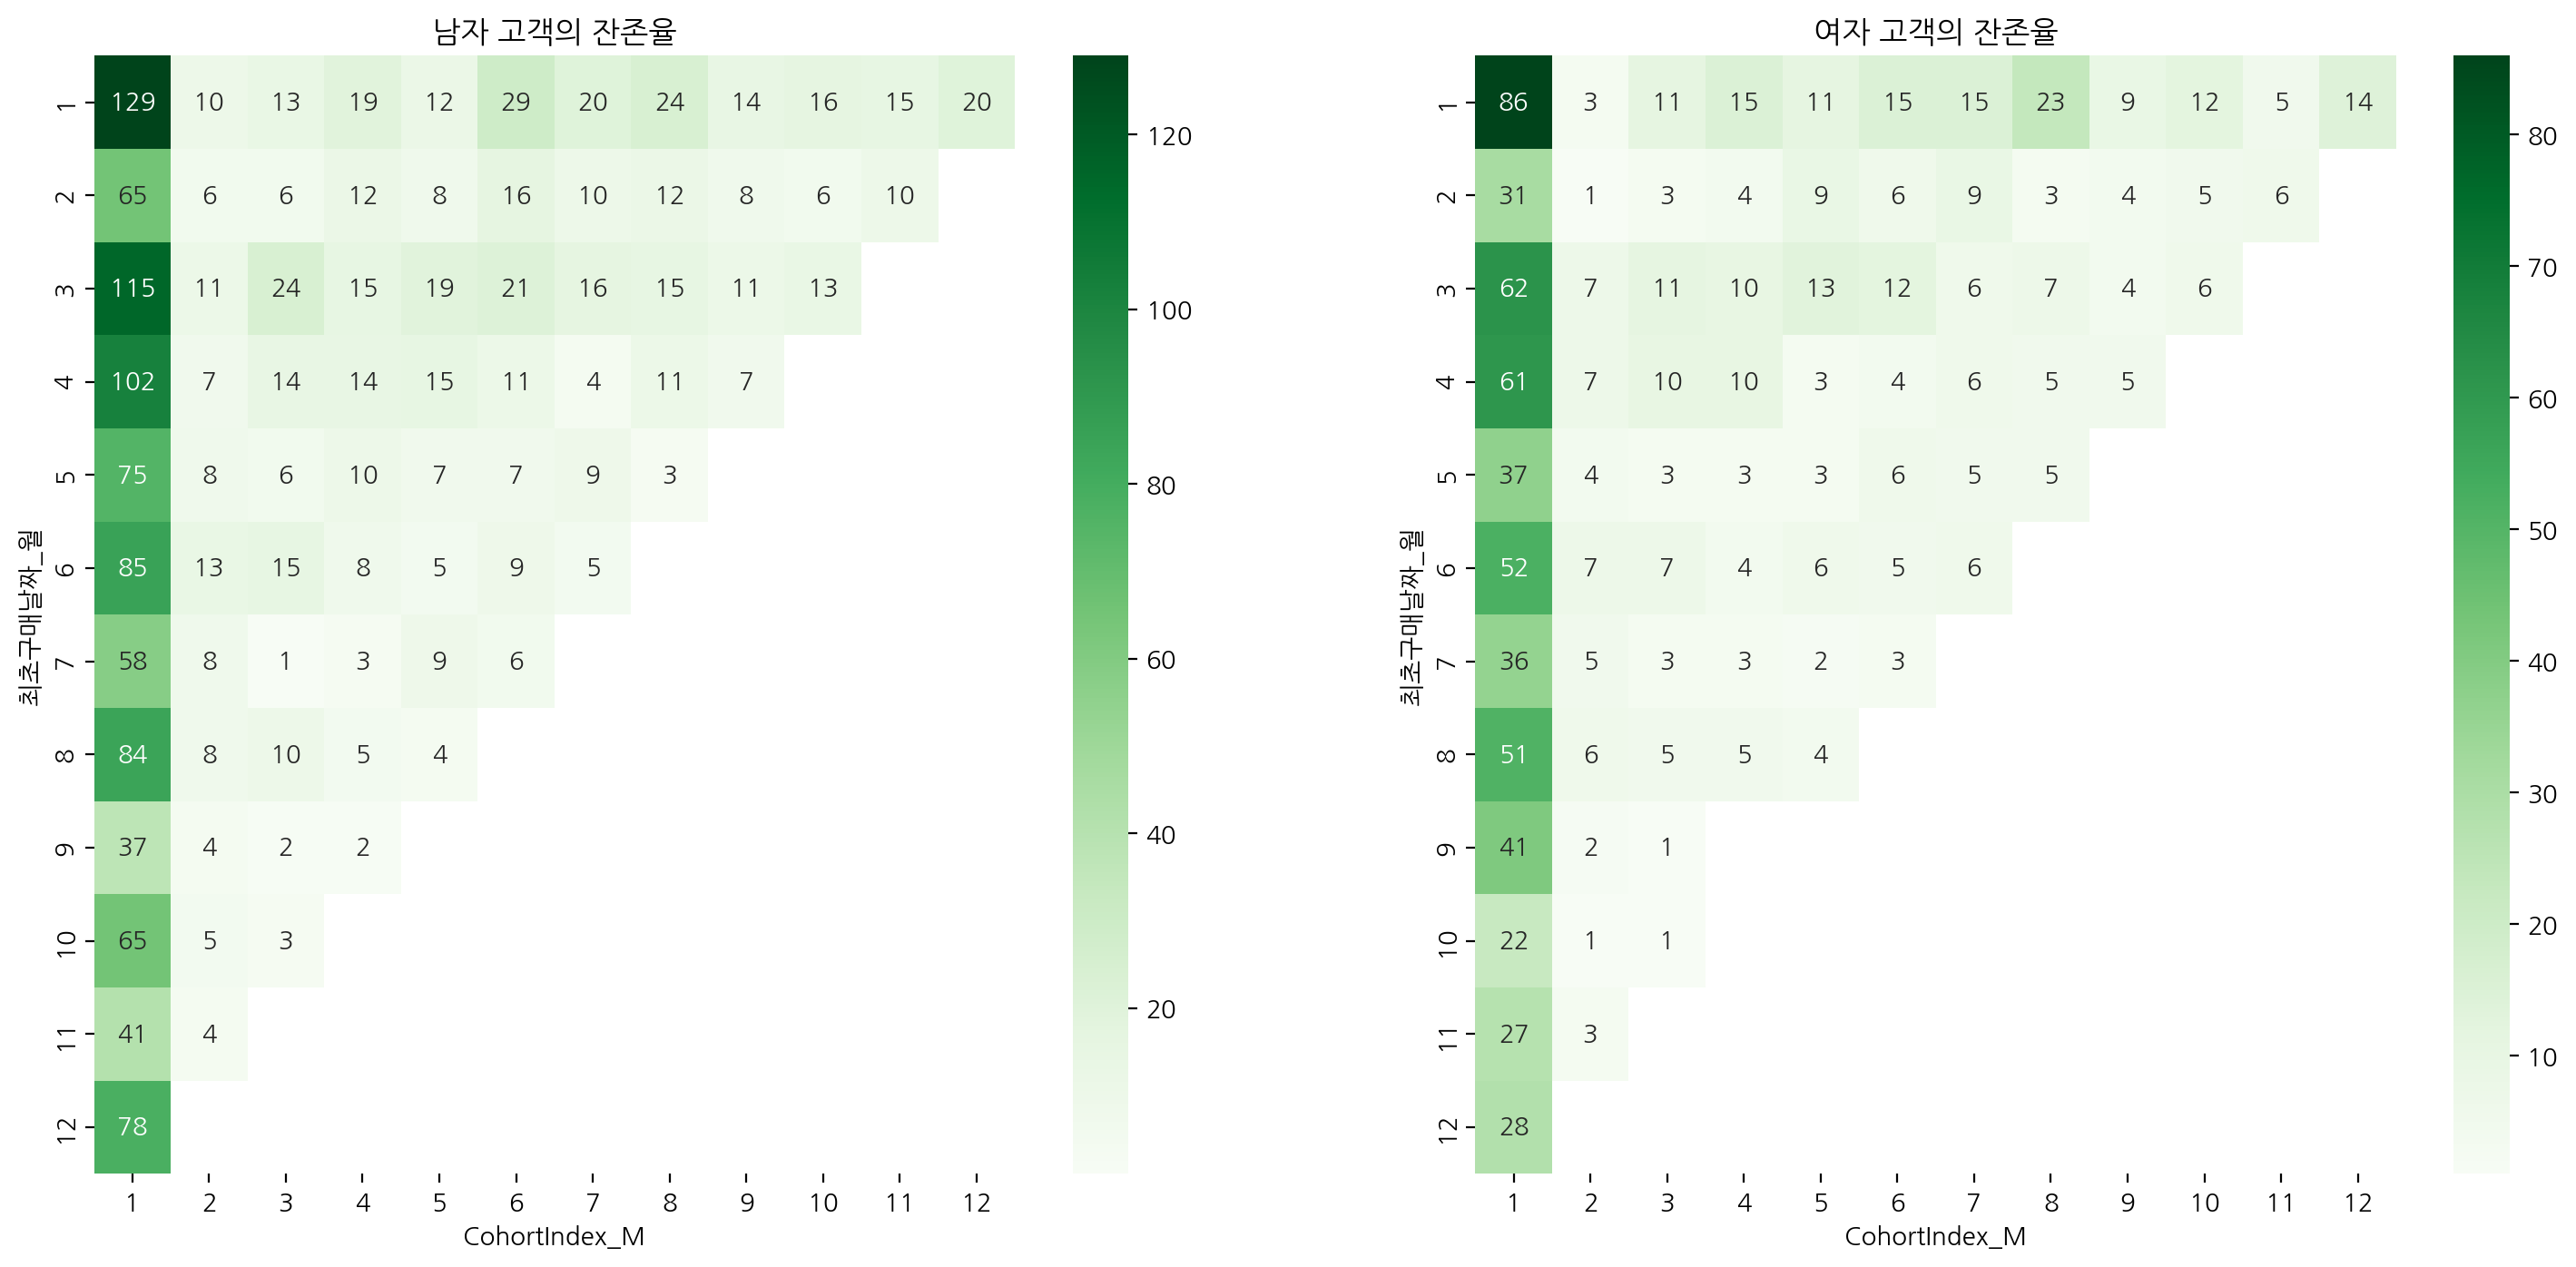

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 여러 개의 히트맵을 subplot으로 배열하기 위한 figure 생성
plt.figure(figsize=(18, 8))

# 남자 고객의 잔존율 히트맵
plt.subplot(1, 2, 1)
sns.heatmap(cohort_count_female, cmap='Greens', annot=True, fmt='.0f')
plt.title('남자 고객의 잔존율')

# 여자 고객의 잔존율 히트맵
plt.subplot(1, 2, 2)
sns.heatmap(cohort_count_male, cmap='Greens', annot=True, fmt='.0f')
plt.title('여자 고객의 잔존율')

plt.show()

In [24]:
#RFM 분석 & K-means
from datetime import datetime

# 거래날짜를 datetime 형식으로 변환
final['거래날짜'] = pd.to_datetime(final['거래날짜'])
final['고유_ID'] = final['고객ID'] + final['거래ID'] + final['제품ID']

# 각 고객별 Recency, Frequency, Monetary 계산
recency = (datetime(2020, 1, 1) - final.groupby('고객ID')['거래날짜'].max()).dt.days
frequency = final.groupby('고객ID')['고유_ID'].count()
monetary = final.groupby('고객ID')['전체금액'].sum()

# RFM 지표 정의
rfm_data = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

In [25]:
# 각 컬럼에 대한 분위수 계산
recency_quantiles = rfm_data['Recency'].quantile([0.25, 0.413, 0.576, 0.75]).values
frequency_quantiles = rfm_data['Frequency'].quantile([0.25, 0.413, 0.576, 0.75]).values
monetary_quantiles = rfm_data['Monetary'].quantile([0.25, 0.413, 0.576, 0.75]).values

# 각 컬럼에 대해 레이블을 나누고 부여하는 함수
def assign_labels(value, quantiles):
    if value <= quantiles[0]:
        return 1
    elif value > quantiles[0] and value <= quantiles[1]:
        return 2
    elif value > quantiles[1] and value <= quantiles[2]:
        return 3
    elif value > quantiles[2] and value <= quantiles[3]:
        return 4
    else:
        return 5

def assign_labels2(value, quantiles):
    if value <= quantiles[0]:
        return 5
    elif value > quantiles[0] and value <= quantiles[1]:
        return 4
    elif value > quantiles[1] and value <= quantiles[2]:
        return 3
    elif value > quantiles[2] and value <= quantiles[3]:
        return 2
    else:
        return 1
# Recency, Frequency, Monetary 각각에 대해 레이블 부여
rfm_data['R'] = rfm_data['Recency'].apply(assign_labels2, args=(recency_quantiles,))
rfm_data['F'] = rfm_data['Frequency'].apply(assign_labels, args=(frequency_quantiles,))
rfm_data['M'] = rfm_data['Monetary'].apply(assign_labels, args=(monetary_quantiles,))

print(rfm_data[['R', 'F', 'M']]) # 결과 확인

           R  F  M
고객ID              
USER_0000  3  1  1
USER_0001  4  5  5
USER_0002  4  3  3
USER_0003  5  2  3
USER_0004  3  4  3
...       .. .. ..
USER_1463  1  1  2
USER_1464  4  4  4
USER_1465  2  1  1
USER_1466  4  1  1
USER_1467  4  5  5

[1468 rows x 3 columns]


In [26]:
# 각각의 레이블을 합쳐서 RFM_SEGMENT 생성
rfm_data["RFM_SEGMENT"] = rfm_data["R"].astype(str) + rfm_data["F"].astype(str) + rfm_data["M"].astype(str)

rfm_data.head() #결과 확인

,Recency,Frequency,Monetary,R,F,M,RFM_SEGMENT
고객ID,,,,,,,
USER_0000,108,2,180.99,3,1,1,311
USER_0001,60,60,14500.04,4,5,5,455
USER_0002,74,23,1639.27,4,3,3,433
USER_0003,18,17,1487.95,5,2,3,523
USER_0004,108,36,2079.96,3,4,3,343


In [27]:
#  R, F, M 값의 합계를 구해서 RFM_SCORE 생성
rfm_data['RFM_SCORE'] = rfm_data[['R', 'F', 'M']].astype(int).sum(axis=1)

rfm_data # 결과 확인

,Recency,Frequency,Monetary,R,F,M,RFM_SEGMENT,RFM_SCORE
고객ID,,,,,,,,
USER_0000,108,2,180.99,3,1,1,311,5
USER_0001,60,60,14500.04,4,5,5,455,14
USER_0002,74,23,1639.27,4,3,3,433,10
USER_0003,18,17,1487.95,5,2,3,523,10
USER_0004,108,36,2079.96,3,4,3,343,10
...,...,...,...,...,...,...,...,...
USER_1463,271,7,822.67,1,1,2,112,4
USER_1464,88,40,2995.47,4,4,4,444,12
USER_1465,195,8,153.06,2,1,1,211,4


In [28]:
import statsmodels.api as sm

# 종속 변수와 독립 변수 설정
X = rfm_data[['Frequency', 'Recency', 'Monetary']]
y = rfm_data['RFM_SCORE']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

print(model.summary()) # 회귀 결과 출력

                            OLS Regression Results                            
Dep. Variable:              RFM_SCORE   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     664.3
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          1.68e-272
Time:                        08:33:19   Log-Likelihood:                -3370.4
No. Observations:                1468   AIC:                             6749.
Df Residuals:                    1464   BIC:                             6770.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2819      0.127     81.210      0.0

In [29]:
import pandas as pd

# 주어진 다중회귀 결과
regression_coefficients = {
    'Recency': -0.0178,
    'Frequency': 0.0324,
    'Monetary': 2.848e-05
}

# 회귀 계수를 절댓값으로 변환하여 가중치 부여
absolute_coefficients = {key: abs(value) for key, value in regression_coefficients.items()}
total_coefficient = sum(absolute_coefficients.values())

# 각 변수에 대한 상대적인 가중치 계산
weights = {key: value / total_coefficient for key, value in absolute_coefficients.items()}

print("RFM 가중치:") # 결과 출력
print(weights)

RFM 가중치:
{'Recency': 0.35438062230830003, 'Frequency': 0.6450523686960068, 'Monetary': 0.00056700899569328}


In [30]:
# 주어진 가중치
weights = {
    'Recency': 0.35438062230830003,
    'Frequency': 0.6450523686960068,
    'Monetary': 0.00056700899569328
}

# 가중치를 기존 데이터프레임에 적용하여 새로운 변수 생성
rfm_data['Recency_weighted'] = rfm_data['Recency'] * weights['Recency']
rfm_data['Frequency_weighted'] = rfm_data['Frequency'] * weights['Frequency']
rfm_data['Monetary_weighted'] = rfm_data['Monetary'] * weights['Monetary']

rfm_data # 새로운 변수가 추가된 DataFrame 출력

,Recency,Frequency,Monetary,R,F,M,RFM_SEGMENT,RFM_SCORE,Recency_weighted,Frequency_weighted,Monetary_weighted
고객ID,,,,,,,,,,,
USER_0000,108,2,180.99,3,1,1,311,5,38.273107,1.290105,0.102623
USER_0001,60,60,14500.04,4,5,5,455,14,21.262837,38.703142,8.221653
USER_0002,74,23,1639.27,4,3,3,433,10,26.224166,14.836204,0.929481
USER_0003,18,17,1487.95,5,2,3,523,10,6.378851,10.965890,0.843681
USER_0004,108,36,2079.96,3,4,3,343,10,38.273107,23.221885,1.179356
...,...,...,...,...,...,...,...,...,...,...,...
USER_1463,271,7,822.67,1,1,2,112,4,96.037149,4.515367,0.466461
USER_1464,88,40,2995.47,4,4,4,444,12,31.185495,25.802095,1.698458
USER_1465,195,8,153.06,2,1,1,211,4,69.104221,5.160419,0.086786


In [32]:
# 새로운 가중치를 적용한 RFM 점수 계산
rfm_data['NEW_RFM_SCORE'] = rfm_data['Recency_weighted'] + rfm_data['Frequency_weighted'] + rfm_data['Monetary_weighted']

rfm_data # 새로운 RFM 점수가 추가된 DataFrame 출력4


,Recency,Frequency,Monetary,R,F,M,RFM_SEGMENT,RFM_SCORE,Recency_weighted,Frequency_weighted,Monetary_weighted,NEW_RFM_SCORE
고객ID,,,,,,,,,,,,
USER_0000,108,2,180.99,3,1,1,311,5,38.273107,1.290105,0.102623,39.665835
USER_0001,60,60,14500.04,4,5,5,455,14,21.262837,38.703142,8.221653,68.187633
USER_0002,74,23,1639.27,4,3,3,433,10,26.224166,14.836204,0.929481,41.989851
USER_0003,18,17,1487.95,5,2,3,523,10,6.378851,10.965890,0.843681,18.188423
USER_0004,108,36,2079.96,3,4,3,343,10,38.273107,23.221885,1.179356,62.674349
...,...,...,...,...,...,...,...,...,...,...,...,...
USER_1463,271,7,822.67,1,1,2,112,4,96.037149,4.515367,0.466461,101.018977
USER_1464,88,40,2995.47,4,4,4,444,12,31.185495,25.802095,1.698458,58.686048
USER_1465,195,8,153.06,2,1,1,211,4,69.104221,5.160419,0.086786,74.351427


In [33]:
# 고객 더 단순화 => RFM_class 파생변수 생성
# Qcut을 통해 5단계로 고객군으로 분류
rfm_data['RFM_CLASS'] = pd.qcut(x=rfm_data['NEW_RFM_SCORE'], q=5, labels=['new', 'usual', 'vip', 'vvip', 'premium'])

rfm_data

,Recency,Frequency,Monetary,R,F,M,RFM_SEGMENT,RFM_SCORE,Recency_weighted,Frequency_weighted,Monetary_weighted,NEW_RFM_SCORE,RFM_CLASS
고객ID,,,,,,,,,,,,,
USER_0000,108,2,180.99,3,1,1,311,5,38.273107,1.290105,0.102623,39.665835,usual
USER_0001,60,60,14500.04,4,5,5,455,14,21.262837,38.703142,8.221653,68.187633,vip
USER_0002,74,23,1639.27,4,3,3,433,10,26.224166,14.836204,0.929481,41.989851,usual
USER_0003,18,17,1487.95,5,2,3,523,10,6.378851,10.965890,0.843681,18.188423,new
USER_0004,108,36,2079.96,3,4,3,343,10,38.273107,23.221885,1.179356,62.674349,vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...
USER_1463,271,7,822.67,1,1,2,112,4,96.037149,4.515367,0.466461,101.018977,vvip
USER_1464,88,40,2995.47,4,4,4,444,12,31.185495,25.802095,1.698458,58.686048,usual
USER_1465,195,8,153.06,2,1,1,211,4,69.104221,5.160419,0.086786,74.351427,vip
